In [14]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from utils import create_expdf, fetch_subdf
from dataset.generate_dataset_1d import poisson_kernel, logarithm_kernel
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

In [15]:
# load data
gn_poisson_df = pd.read_csv('../results/poisson1d/GN1D-rational-513-50-1.0000-none-2/hist.csv')
gnaug2_poisson_df = pd.read_csv('../results/poisson1d/GN1D-rational-513-50-1.0000-aug2-2/hist.csv')
gn_poisson_kernel = np.load('../results/poisson1d/GN1D-rational-513-50-1.0000-none-2/approx_kernel.npy')
gnaug2_poisson_kernel = np.load('../results/poisson1d/GN1D-rational-513-50-1.0000-aug2-2/approx_kernel.npy')

# process green's function
idx = 257
nh = 513
h = 1/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G = poisson_kernel(x_i[:,0], x_i[:,1], h).numpy()#.reshape(nh, nh)
G_gn = gn_poisson_kernel.reshape(-1)/h #.reshape(513,513) / h
G_gnaug2 = gnaug2_poisson_kernel/h #.reshape(513,513) / h

GL-aug Green's Function

In [16]:
G.min(), G.max()

(-0.00024414062, 0.24975586)

In [17]:
levels =  np.linspace(0,0.25,30)

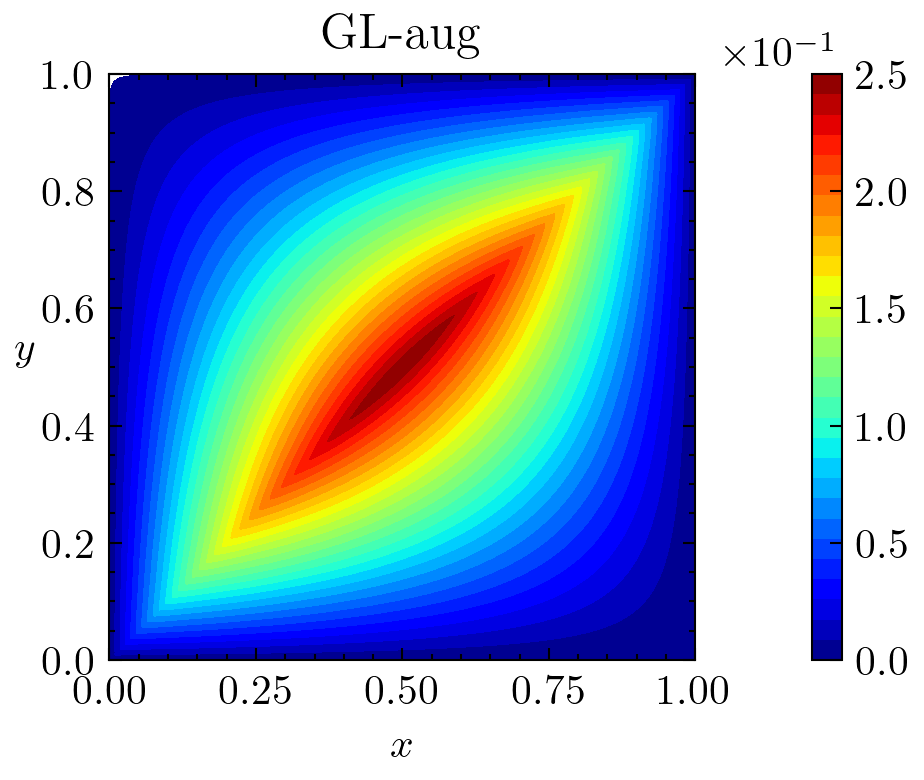

In [18]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gnaug2.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './poisson1d_GL-aug.png'
plt.savefig(outnm)

GL Green's Function

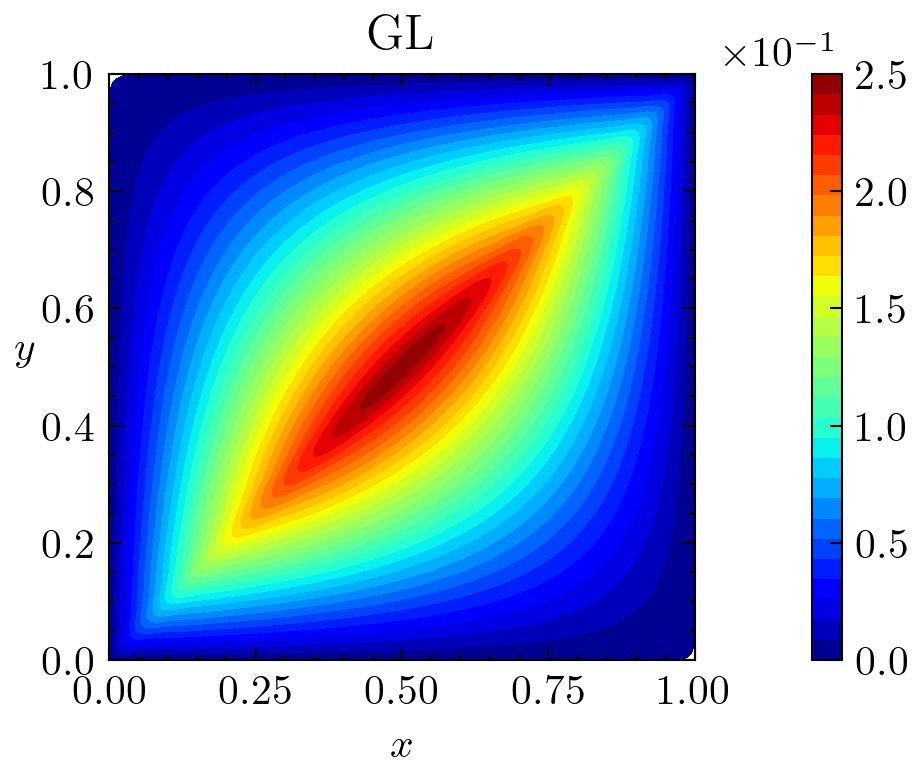

In [19]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gn.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './poisson1d_GL.png'
plt.savefig(outnm)

Exact Green's Function

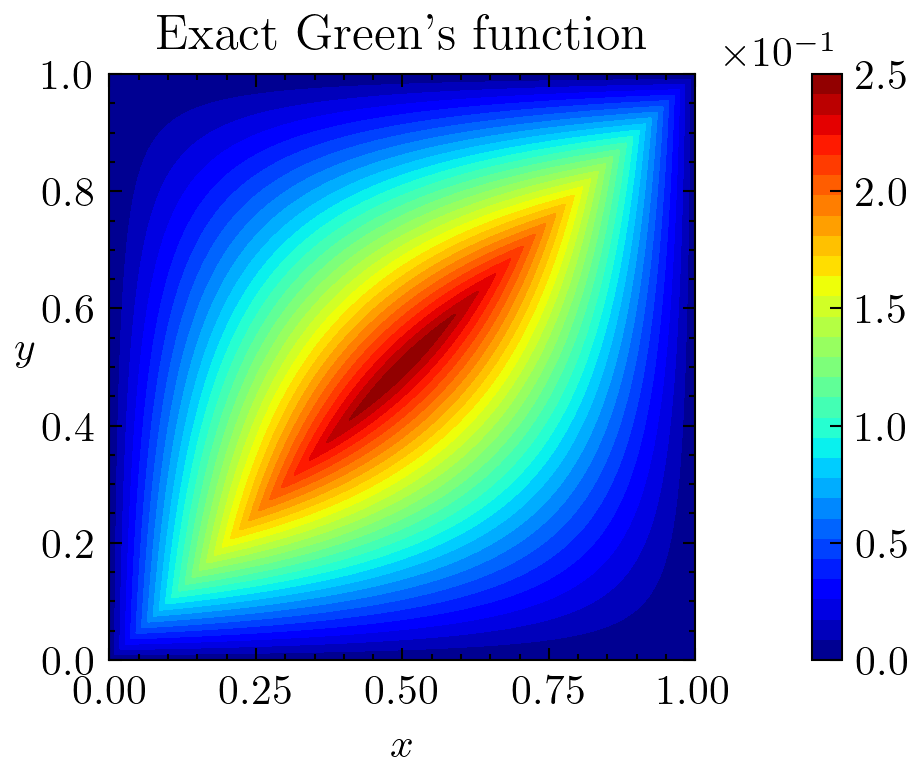

In [20]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Exact Green\'s function')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './poisson1d_Exact.png'
plt.savefig(outnm)

GL-aug Error

In [8]:
np.abs(G_gnaug2-G).min(), np.abs(G_gnaug2-G).max()

(0.0, 0.0013223663)

In [9]:
levels = np.linspace(0, 0.0015,30)

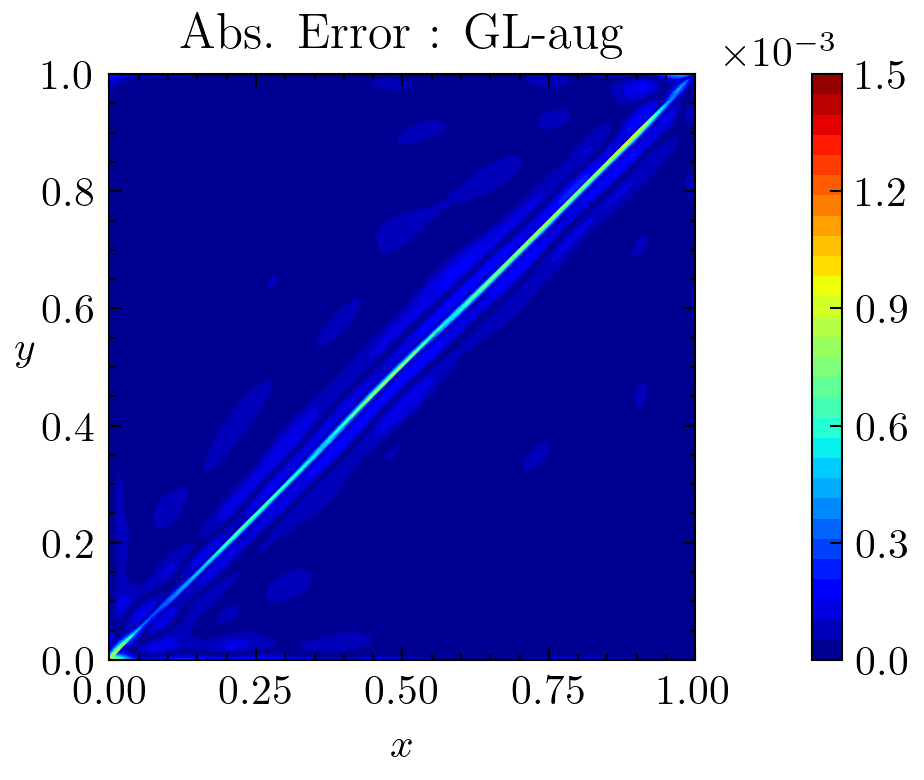

In [10]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_gnaug2-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Abs. Error : GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './poisson1d_GL-aug_err.png'
plt.savefig(outnm)

GL Error

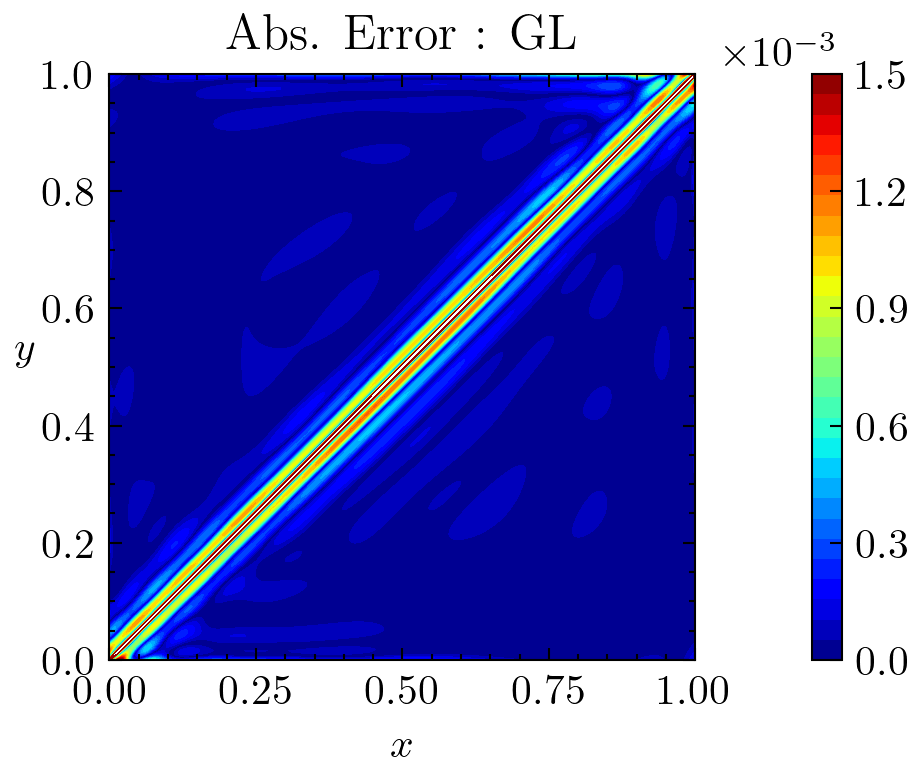

In [11]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_gn-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Abs. Error : GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './poisson1d_GL_err.png'
plt.savefig(outnm)

GL/GL-aug compare at x=0.5

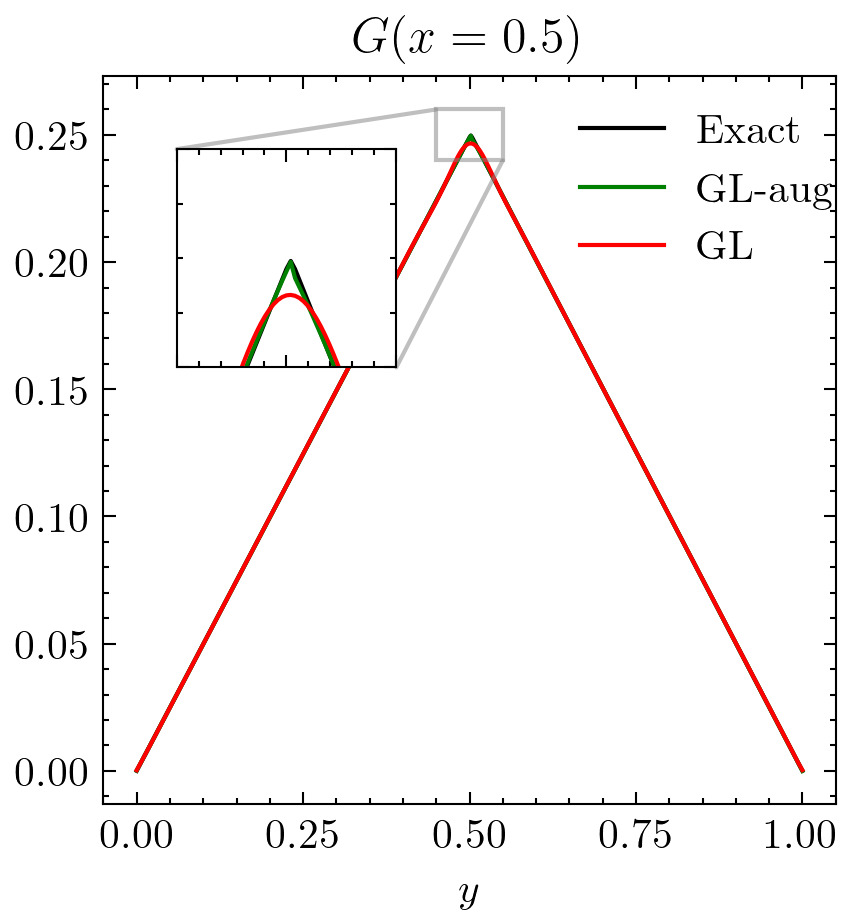

In [12]:
# visualize kernel slice
G_ = G.reshape(nh,nh)[idx]
G_gn_ = G_gn.reshape(nh,nh)[idx]
G_gnaug2_ = G_gnaug2.reshape(nh,nh)[idx]

f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
ax.plot(xh, G_, '-k',label='Exact')
ax.plot(xh, G_gnaug2_, '-g',label='GL-aug')
ax.plot(xh, G_gn_, '-r', label='GL')
ax.title.set_text('$G(x=0.5)$')
ax.set_xlabel('$y$')
# ax.set_ylabel('$G(x=0.5)$', rotation=0)
axins = ax.inset_axes(
    [0.1, 0.6, 0.3, 0.3], xlim=(0.45, 0.55),ylim=(0.24,0.26),
    xticklabels=[], yticklabels=[])
axins.plot(xh, G_, '-k', label='analytic')
axins.plot(xh, G_gnaug2_, '-g', label='GL-aug')
axins.plot(xh, G_gn_, '-r', label='GL')
ax.indicate_inset_zoom(axins)
ax.legend(bbox_to_anchor=(0.6, 1))

outnm = './poisson1d_slice.png'
plt.savefig(outnm)